In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('brain_stroke.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [3]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


# Remove and append data in respective column

In [5]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)

In [6]:
cat

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [7]:
num

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [8]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [9]:
num.remove('stroke')
num.remove('hypertension')
num.remove('heart_disease')

In [10]:
cat.append('stroke')
cat.append('hypertension')
cat.append('heart_disease')

# Balancing data in Categorical column

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
def cat_analysis(col):
    df[col].value_counts()
    sns.countplot(x=df[col])
    plt.show()

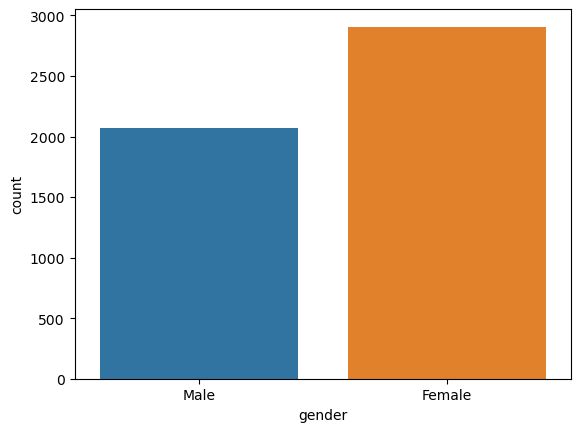

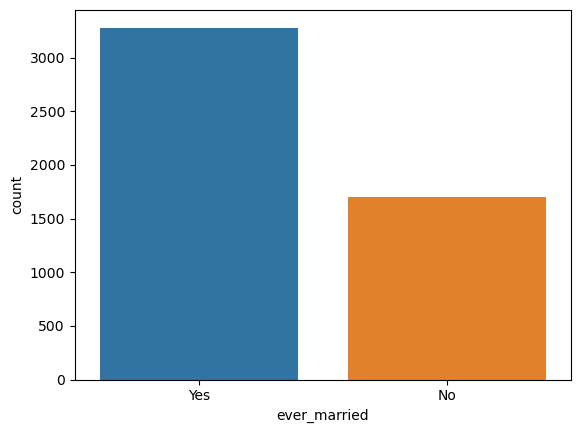

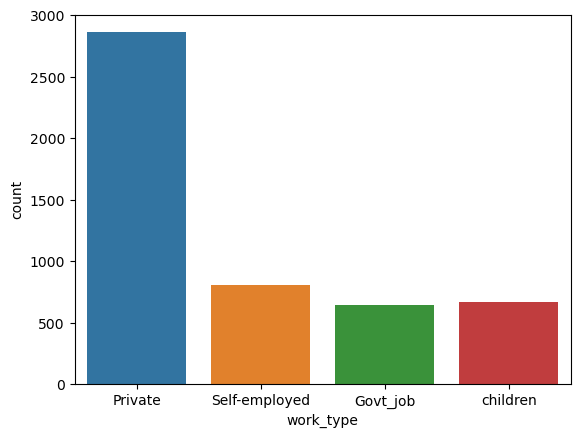

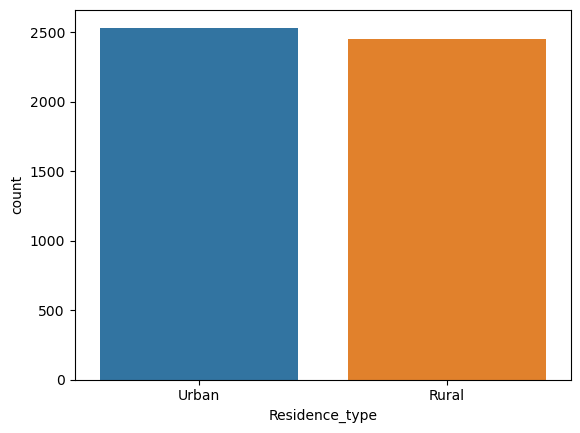

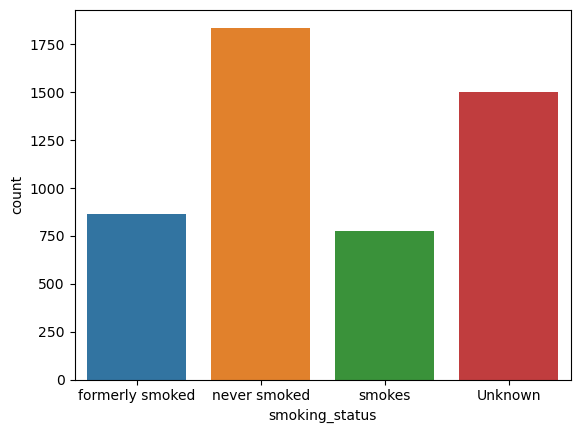

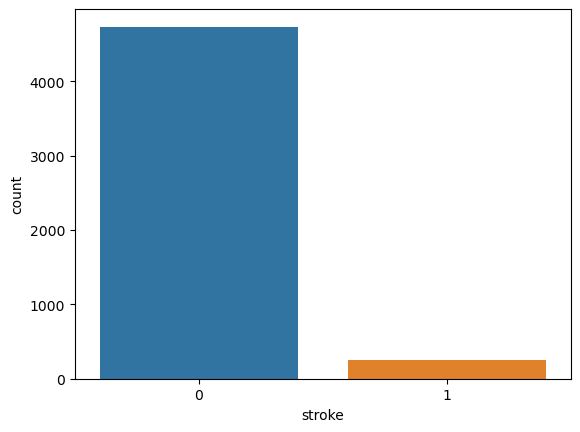

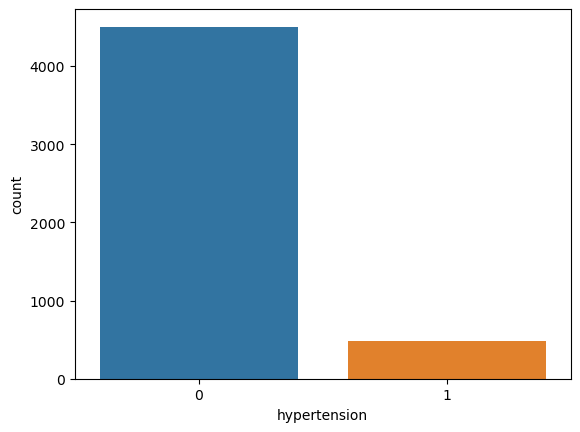

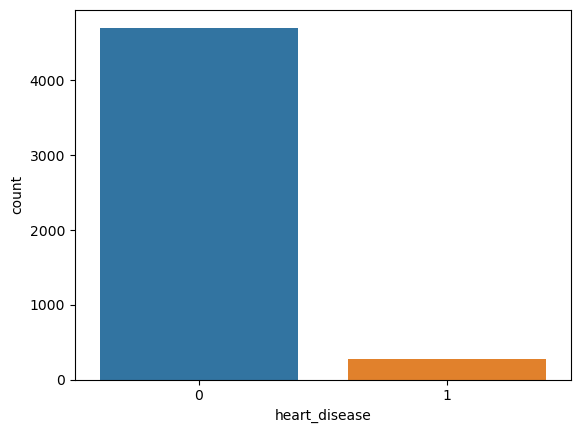

In [12]:
for i in cat:
    cat_analysis(i)

# checking unique value counts

In [13]:
smoking=df['smoking_status'].value_counts()*100/4981
smoking

smoking_status
never smoked       36.900221
Unknown            30.114435
formerly smoked    17.406143
smokes             15.579201
Name: count, dtype: float64

# Outlier Detection for Numerical column

In [14]:
def outlier_detection_treatment(col):
    q1= df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    iqr= q3-q1
    lf= q1- 1.5*iqr
    uf= q3+ 1.5*iqr
    outliers= df[(df[col]<lf) | (df[col]>uf)]
    print("Percentage of outliers in", col ,outliers.shape[0]*100/df.shape[0])
    fig, ax= plt.subplots(1,2, figsize=(6,4))
    ax[0].boxplot(df[col])
    ax[1].hist(df[col])
    plt.suptitle(col)
    plt.show()
    df.loc[(df[col]<lf) | (df[col]>uf), col]= df[col].median()

Percentage of outliers in age 0.0


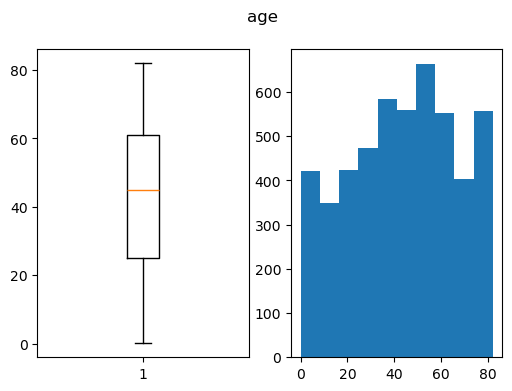

Percentage of outliers in avg_glucose_level 12.08592652077896


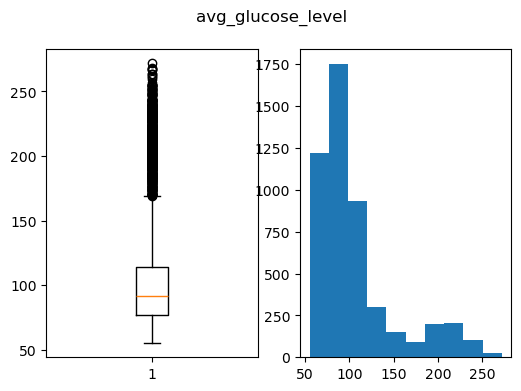

Percentage of outliers in bmi 0.8632804657699257


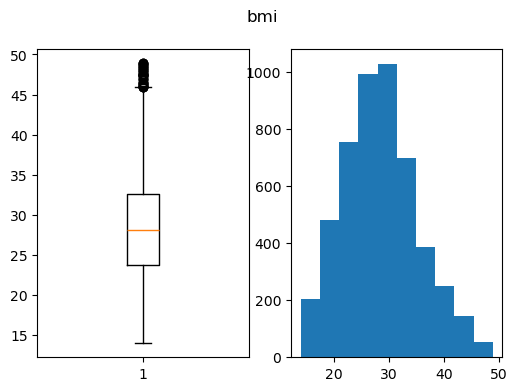

In [15]:
for i in num:
    outlier_detection_treatment(i)

In [16]:
df.drop(['heart_disease','hypertension'], axis=1, inplace=True)

In [17]:
df

,gender,age,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,Yes,Private,Urban,91.85,36.6,formerly smoked,1
1,Male,80.0,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,Yes,Private,Urban,91.85,34.4,smokes,1
3,Female,79.0,Yes,Self-employed,Rural,91.85,24.0,never smoked,1
4,Male,81.0,Yes,Private,Urban,91.85,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,Yes,Private,Urban,91.85,31.1,smokes,0
4978,Female,45.0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,Yes,Private,Rural,83.94,30.0,smokes,0


# checking co-relation

<Axes: >

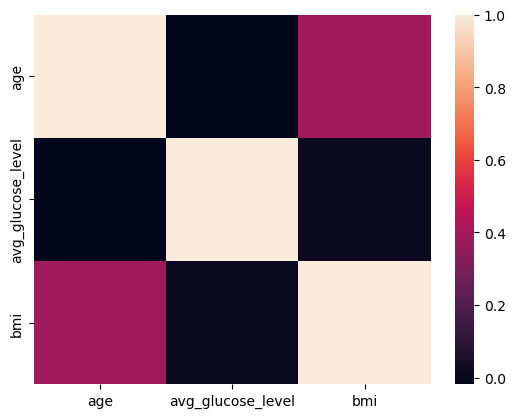

In [18]:
sns.heatmap(df.loc[:, num].corr())

In [19]:
df.drop(['smoking_status'],axis=1,inplace = True)

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [21]:
stroke=LabelEncoder()
ever_married=LabelEncoder()
Residence_type=LabelEncoder()

In [22]:
df['ever_married']=ever_married.fit_transform(df['ever_married'])

In [23]:
df['Residence_type']=Residence_type.fit_transform(df['Residence_type'])

In [24]:
df['stroke']= stroke.fit_transform(df['stroke'])

In [25]:
for i in df.columns:
    if (df[i].dtype== 'object'):
        print(i,df[i].unique())
        print()
        print()

gender ['Male' 'Female']


work_type ['Private' 'Self-employed' 'Govt_job' 'children']




**OneHotEncoding**

In [26]:
ohe=OneHotEncoder(sparse_output=False)
wt= ohe.fit_transform(df[["work_type"]])
df_wt= pd.DataFrame(wt,columns= ohe.categories_ )
df_wt.drop('Private', axis= 1, inplace=True)
df_wt

,Govt_job,Self-employed,children
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,0.0
...,...,...,...
4976,0.0,0.0,0.0
4977,0.0,0.0,0.0
4978,1.0,0.0,0.0
4979,0.0,0.0,0.0


In [27]:
ohegen=OneHotEncoder(sparse_output=False)
np_gen= ohegen.fit_transform(df[["gender"]])
df_gen= pd.DataFrame(np_gen,columns= ohegen.categories_ )
df_gen.drop('Male', axis= 1, inplace=True)
df_gen

,Female
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
4976,0.0
4977,0.0
4978,1.0
4979,0.0


<Axes: >

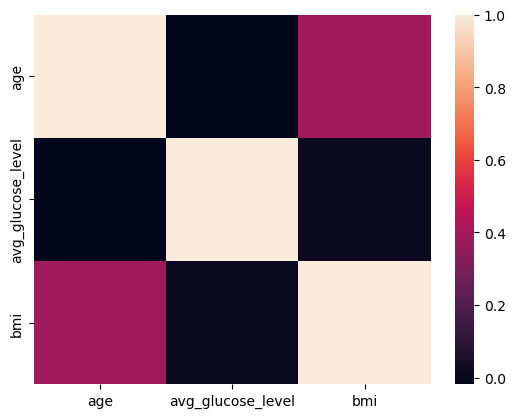

In [28]:
sns.heatmap(df.loc[:, num].corr())

In [29]:
X= df.drop(['stroke', 'work_type','gender'], axis= 1)
X= pd.concat([X, df_wt, df_gen], axis= 1)
y= df['stroke']

In [30]:
X

,age,ever_married,Residence_type,avg_glucose_level,bmi,"(Govt_job,)","(Self-employed,)","(children,)","(Female,)"
0,67.0,1,1,91.85,36.6,0.0,0.0,0.0,0.0
1,80.0,1,0,105.92,32.5,0.0,0.0,0.0,0.0
2,49.0,1,1,91.85,34.4,0.0,0.0,0.0,1.0
3,79.0,1,0,91.85,24.0,0.0,1.0,0.0,1.0
4,81.0,1,1,91.85,29.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0.0,0.0,0.0,0.0
4977,40.0,1,1,91.85,31.1,0.0,0.0,0.0,0.0
4978,45.0,1,0,95.02,31.8,1.0,0.0,0.0,1.0
4979,40.0,1,0,83.94,30.0,0.0,0.0,0.0,0.0


In [31]:
X.columns

Index([              'age',      'ever_married',    'Residence_type',
       'avg_glucose_level',               'bmi',       ('Govt_job',),
        ('Self-employed',),       ('children',),         ('Female',)],
      dtype='object')

In [32]:
X= X.values
y= y.values

In [33]:
X

array([[67.,  1.,  1., ...,  0.,  0.,  0.],
       [80.,  1.,  0., ...,  0.,  0.,  0.],
       [49.,  1.,  1., ...,  0.,  0.,  1.],
       ...,
       [45.,  1.,  0., ...,  0.,  0.,  1.],
       [40.,  1.,  0., ...,  0.,  0.,  0.],
       [80.,  1.,  1., ...,  0.,  0.,  1.]])

# Training and Testing data

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3, random_state= 90)

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
dt= DecisionTreeClassifier(max_depth=9)

In [38]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=9)

In [39]:
y_pred_train= dt.predict(X_train)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [41]:
print(accuracy_score(y_train, y_pred_train))

0.9693057946069994


In [42]:
y_pred_test= dt.predict(X_test)

In [43]:
print(accuracy_score(y_test, y_pred_test))

0.9270903010033444


In [44]:
print(confusion_matrix(y_train, y_pred_train))

[[3306    8]
 [  99   73]]


In [45]:
print(confusion_matrix(y_test, y_pred_test))

[[1382   37]
 [  72    4]]


# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr=LogisticRegression()

In [48]:
lr.fit(X_train,y_train)

C:\Users\UPPU\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
lr_pred_train=lr.predict(X_train)

In [50]:
print(confusion_matrix(y_train,lr_pred_train))

[[3314    0]
 [ 172    0]]


In [51]:
print(accuracy_score(y_train,lr_pred_train))

0.9506597819850832


In [52]:
lr_pred_test=lr.predict(X_test)

In [53]:
print(accuracy_score(y_test,lr_pred_test))

0.9491638795986622


In [54]:
 from sklearn.model_selection import GridSearchCV


In [55]:
grid= {
    'C':[0.1,1,10,20,50,100],
    'penalty':['l1','l2','elastiicent','none'],
    'solver':['newton-cg','lbfgs','sag','saga']
}

In [56]:
gridsearch=GridSearchCV(estimator=lr, param_grid=grid,cv=5,n_jobs=-1, scoring='accuracy')

In [57]:
gridsearch.fit(X_train,y_train)

C:\Users\UPPU\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
210 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\UPPU\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\UPPU\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\UPPU\anaconda3\Lib\site-packages\sklearn\linear_model\_logi

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 20, 50, 100],
                         'penalty': ['l1', 'l2', 'elastiicent', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             scoring='accuracy')

In [58]:
lr_grid_pred_train=gridsearch.predict(X_train)
print(accuracy_score(y_train,lr_grid_pred_train))

0.9506597819850832


In [59]:
lr_grid_pred_test=gridsearch.predict(X_test)
print(accuracy_score(y_test,lr_grid_pred_test))

0.9491638795986622


In [60]:
gridsearch.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [61]:
lr.predict_proba(X_train)

array([[9.99755863e-01, 2.44137052e-04],
       [9.01409338e-01, 9.85906625e-02],
       [9.89992111e-01, 1.00078889e-02],
       ...,
       [9.76150017e-01, 2.38499830e-02],
       [9.94871434e-01, 5.12856587e-03],
       [9.91473512e-01, 8.52648813e-03]])

In [62]:
prob=lr.predict_proba(X_train)[:,1]

In [63]:
prob

array([0.00024414, 0.09859066, 0.01000789, ..., 0.02384998, 0.00512857,
       0.00852649])

In [64]:
prediction=(prob>=0.9).astype(int)

In [65]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
accuracy_score(y_train,prediction)

0.9506597819850832

# Support Vector Machine

In [67]:
from sklearn.svm import SVC

In [68]:
scv=SVC()

In [69]:
scv.fit(X_train,y_train)

SVC()

In [70]:
svc_train_pred=scv.predict(X_train)

In [71]:
accuracy_score(y_train,svc_train_pred)

0.9506597819850832

In [72]:
svc_test_pred=scv.predict(X_test)

In [73]:
accuracy_score(y_test,svc_test_pred)

0.9491638795986622

# Decision Tree

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:

rf=RandomForestClassifier(max_depth=10)

In [76]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [77]:
rf_train_pred=rf.predict(X_train)

In [78]:
accuracy_score(y_train,rf_train_pred)

0.9635685599541022

In [79]:
rf_test_pred=rf.predict(X_test)

In [80]:
accuracy_score(y_test,rf_test_pred)

0.948494983277592

# Voting Classifier

In [81]:
from sklearn.ensemble import VotingClassifier


In [82]:

dtree=DecisionTreeClassifier(max_depth=10)
log_reg=LogisticRegression()
rand_for= RandomForestClassifier(max_depth=10)


In [83]:
est=[('dtree',dtree),
    ('log_reg',log_reg),
    ('rand_for',rand_for)]

In [84]:
vc=VotingClassifier(estimators=est,voting='hard')

In [85]:
vc.fit(X_train,y_train)

C:\Users\UPPU\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('dtree', DecisionTreeClassifier(max_depth=10)),
                             ('log_reg', LogisticRegression()),
                             ('rand_for',
                              RandomForestClassifier(max_depth=10))])

In [86]:
vc_train_pred=vc.predict(X_train)

In [87]:
accuracy_score(y_train,vc_train_pred)

0.9589787722317843

In [88]:
vc_test_pred=vc.predict(X_test)

In [89]:
accuracy_score(y_test,vc_test_pred)

0.9491638795986622